Demo using real data - a different region

In [1]:
%matplotlib inline
from __future__ import division, print_function
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import fitsio
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

import query_wise_mask

In [ ]:
# ls -lh /global/project/projectdirs/cosmo/data/legacysurvey/dr5/sweep/5.0/

In [4]:
cat = fitsio.read('/global/project/projectdirs/cosmo/data/legacysurvey/dr5/sweep/5.0/sweep-110p025-120p030.fits', 
                  columns=['RA', 'DEC', 'WISEMASK_W1', 'WISEMASK_W2'])
print(len(cat))

ra = np.array(cat['RA'])
dec = np.array(cat['DEC'])
wisemask_w1 = np.array(cat['WISEMASK_W1'])
wisemask_w2 = np.array(cat['WISEMASK_W2'])

2653591


In [6]:
# Obtain WISE mask value at each location
mask_value = query_wise_mask.query_mask_value(ra, dec)

Finding the nearest coadd
0%
9%
18%
26%
35%
44%
53%
62%
71%
79%
88%
97%
2632194 (99.2%) objects inside the nearest coadd

Finding the second nearest coadd
0%
8%
17%
25%
33%
42%
50%
58%
67%
75%
83%
92%
203629 (7.7%) objects inside the second nearest coadd

Finding the third nearest coadd
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
10756 (0.4%) objects inside the third nearest coadd

2448486 (92.3%) objects only inside the nearest coadd
17822 (0.7%) objects only inside the second nearest coadd
0 (0.0%) objects only inside the third nearest coadd

2610498 (98.4%) objects belong to the nearest coadd
43093 (1.6%) objects belong to the second nearest coadd
0 (0.0%) objects belong to the third nearest coadd

Obtaining mask values from images
0%
7%
14%
21%
29%
36%
43%
50%
57%
64%
71%
79%
86%
93%


-----------
## Verify

In [7]:
mask_value_w1 = mask_value%4
mask_value_w2 = mask_value//4

In [8]:
print(np.sum(wisemask_w1!=0))
print(np.sum(wisemask_w2!=0))

20006
7613


In [9]:
print(np.sum(mask_value_w1!=wisemask_w1))
print(np.sum(mask_value_w2!=wisemask_w2))

93
31


In [10]:
print('Fraction of objects that show discrepancies:')
print(np.sum((mask_value_w1!=wisemask_w1) | (mask_value_w2!=wisemask_w2))/np.sum((wisemask_w1!=0) | (wisemask_w2!=0)))

Fraction of objects that show discrepancies:
0.00605519158229


In [11]:
# Obtain intermediate values
coadd_idx, pixcrd_x, pixcrd_y = query_wise_mask.query_wise_coadd(ra, dec, verbose=False)

# Load coadd table
coadd = Table.read(query_wise_mask.coadd_fn)

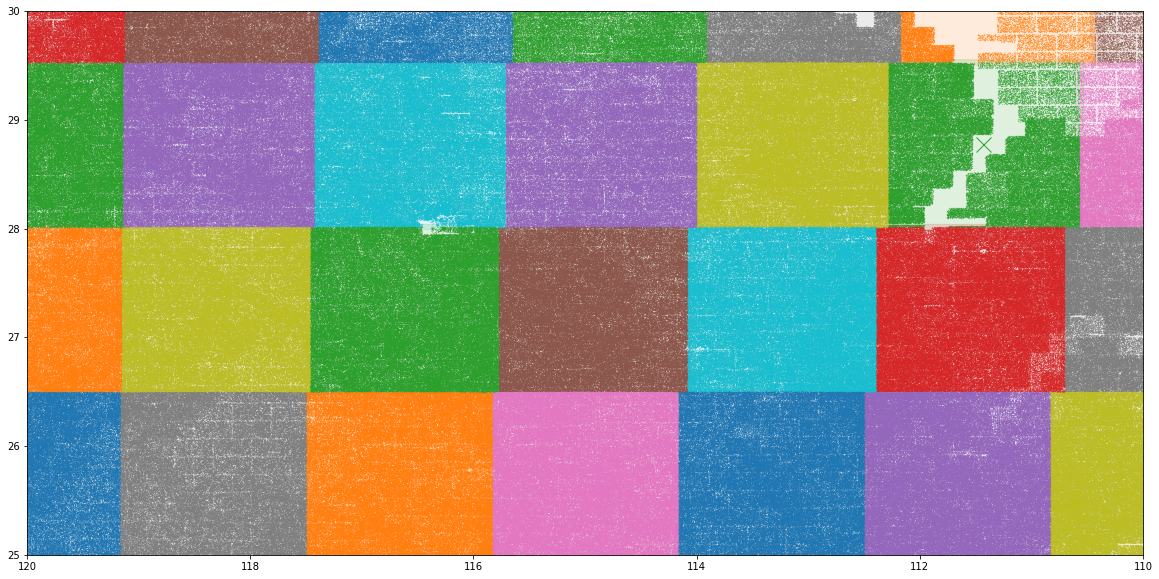

In [12]:
# All objects

ramin, ramax, decmin, decmax = ra.min(), ra.max(), dec.min(), dec.max()
color_index = 0
patches = []
colors =[]
fig, ax = plt.subplots(figsize=(20, 10))
for index in range(len(coadd)):
    if (ramin-5<coadd['ra_center'][index]<ramax+5) and (decmin-2<coadd['dec_center'][index]<decmax+2):
        polygon = Polygon(
            np.stack((coadd['ra_corners'][index], 
                      coadd['dec_corners'][index])).transpose(),
                      True)
        patches.append(polygon)
        colors.append('C{}'.format(color_index%10))
        plt.plot(coadd['ra_center'][index], coadd['dec_center'][index], 'C{}x'.format(color_index%10), markersize=15)
        mask = (coadd_idx==index)
        plt.plot(ra[mask], dec[mask], 'C{}.'.format(color_index%10), markersize=0.3)
        color_index += 1
p = PatchCollection(patches, alpha=0.15)
p.set_color(colors)
ax.add_collection(p)
plt.axis([ramax, ramin, decmin, decmax])
plt.show()

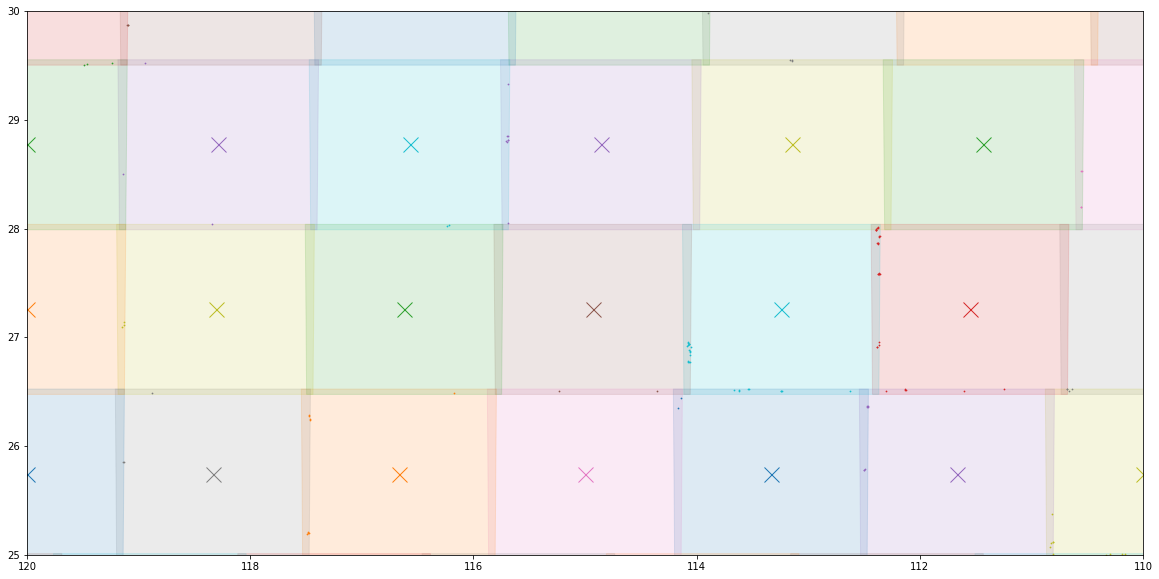

In [13]:
# Objects that has discrepant values in wisemask_w1 or wisemask_w2
mask_diff = (mask_value_w1!=wisemask_w1) | (mask_value_w2!=wisemask_w2)

ramin, ramax, decmin, decmax = ra.min(), ra.max(), dec.min(), dec.max()
color_index = 0
patches = []
colors =[]
fig, ax = plt.subplots(figsize=(20, 10))
for index in range(len(coadd)):
    if (ramin-5<coadd['ra_center'][index]<ramax+5) and (decmin-2<coadd['dec_center'][index]<decmax+2):
        polygon = Polygon(
            np.stack((coadd['ra_corners'][index], 
                      coadd['dec_corners'][index])).transpose(),
                      True)
        patches.append(polygon)
        colors.append('C{}'.format(color_index%10))
        plt.plot(coadd['ra_center'][index], coadd['dec_center'][index], 'C{}x'.format(color_index%10), markersize=15)
        mask = mask_diff & (coadd_idx==index)
        plt.plot(ra[mask], dec[mask], 'C{}.'.format(color_index%10), markersize=1.5)
        color_index += 1
p = PatchCollection(patches, alpha=0.15)
p.set_color(colors)
ax.add_collection(p)
plt.axis([ramax, ramin, decmin, decmax])
plt.show()